# Programming Practice I
## 1 Overview
In this practice, you can learn the basic knowledge of Python. In particular, by doing this practice, it is expected that you can:
* get familiar with the basic syntax of Python;
* get the basic idea of NumPy;
* get the basic idea of Matplotlib for visualization.

**Important**: There could by many possible solutions and this solution is only an example for you.

*Please let us know if you find any typos or mistakes within this solution. Thank you in advance.*

## 2 Tasks
In this section, you can start the programming practice task by task. Please pay attention to the hints as well as the API documents online.

### 2.1 Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.2 1D Dataset
> In machine learning and deep learning, we often use x/X to denote the input data (e.g., images) and y/Y to denote the corresponding ground truth (e.g., class label).

In [2]:
N_SAMPLES = 100
X = np.linspace(-1, 1, N_SAMPLES)
Y = 0.1 * X + np.power(X, 2) + np.power(X, 3)  # or Y = 0.1*X + X**2 + X**3

In [3]:
def create_toy_dataset(n_samples=100):
    X = np.linspace(-1, 1, n_samples)
    Y = 0.1 * X + np.power(X, 2) + np.power(X, 3)
    return X, Y

In [4]:
class Dataset():
    def __init__(self, n_samples=100):
        self.n_samples = n_samples
    
    def load_data(self):
        self.X = np.linspace(-1, 1, self.n_samples)
        self.Y = 0.1 * self.X + np.power(self.X, 2) + np.power(self.X, 3)
        return self.X, self.Y

### 2.3 Plot the 1D Dataset

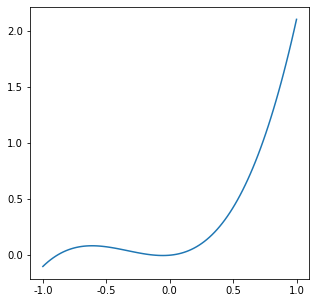

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(X, Y)
plt.xticks(ticks=np.linspace(-1, 1, 5), labels=np.linspace(-1, 1, 5))
plt.show()

### 2.4 2D Dataset

In [6]:
random_state = np.random.RandomState(42)
X = random_state.randn(100, 2)
Y = np.ones(shape=(100, ))
Y[np.sum(np.square(X), axis=-1)<1] = 0

# an alternative to fix the seed:
# np.random.seed(42)
# X = np.random.randn(100, 2)
# Question for you: What is the difference between np.random.seed() and np.random.RandomState()?

### 2.5 Plot the 2D Dataset

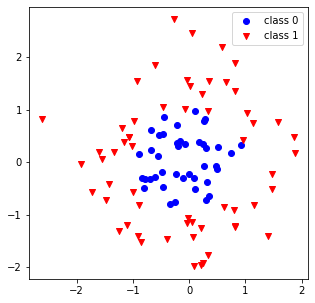

In [7]:
plt.figure(figsize=(5, 5))
plt.scatter(X[Y==0, 0], X[Y==0, 1], marker='o', c='b', label='class 0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], marker='v', c='r', label='class 1')
plt.legend()
plt.show()

### 2.6 A Simple Convolution

In [8]:
X = np.arange(0, 16).reshape(4, 4)
W = np.ones(shape=(2, 2))

X_conv = np.zeros(shape=(3, 3))

for i in range(X_conv.shape[0]):
    for j in range(X_conv.shape[1]):
        X_conv[i, j] = np.sum(X[i:(i+2), j:(j+2)] * W)

print(X_conv)

[[10. 14. 18.]
 [26. 30. 34.]
 [42. 46. 50.]]


In [9]:
def convolve(X, W):
    (X_height, X_width) = X.shape
    (W_height, W_width) = W.shape
    
    # X_height and X_width should be larger than W_height and W_width, respectively.
    
    X_conv_height, X_conv_width = X_height - W_height + 1, X_width - W_width + 1
    X_conv = np.zeros(shape=(X_conv_height, X_conv_width))

    for i in range(X_conv.shape[0]):
        for j in range(X_conv.shape[1]):
            X_conv[i, j] = np.sum(X[i:(i+W_height), j:(j+W_width)] * W)
    return X_conv